# Die Titanic, die!
![](https://thegrapevinegossip.com/wp-content/uploads/2017/12/Top-Funniest-Titanic-Memes-11.jpg)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
path = "/home/arios/Descargas/train.csv"
data_titanic = pd.read_csv(path)

## Información del dataset

In [5]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data_titanic.shape

(891, 12)

In [37]:
import random
pasajero = data_titanic.iloc[random.randint(0, len(data_titanic))]

In [38]:
pasajero

PassengerId                             829
Survived                                  1
Pclass                                    3
Name           McCormack, Mr. Thomas Joseph
Sex                                    male
Age                                     NaN
SibSp                                     0
Parch                                     0
Ticket                               367228
Fare                                   7.75
Cabin                                   NaN
Embarked                                  Q
Name: 828, dtype: object

## Detalles de las columnas

In [7]:
data_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Valores nulos

In [8]:
data_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Cantidad de columnas

In [9]:
data_titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## Cuantos sobrevivieron por sexo y clase

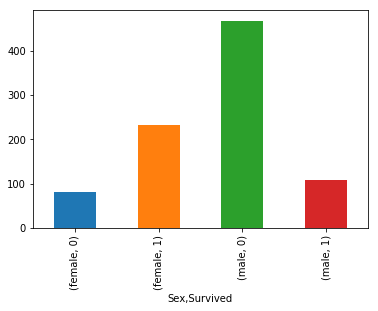

In [10]:
data_sexo_clase = data_titanic.groupby(['Sex', 'Survived'])['Survived'].count().plot.bar()                                               

In [11]:
data_sexo = data_titanic[['Sex', 'Survived']].groupby(['Sex']).mean()

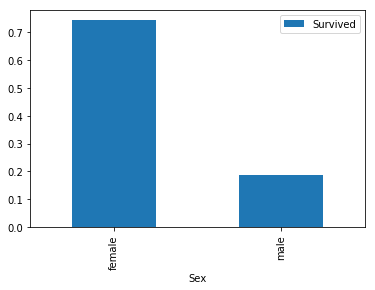

In [12]:
data_sexo.plot.bar()

In [13]:
pasajero = data_titanic.iloc[random.randint(0, len(data_titanic))]
sr = data_sexo.loc[pasajero.Sex]
print(pasajero,sr)

PassengerId                 614
Survived                      0
Pclass                        3
Name           Horgan, Mr. John
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   370377
Fare                       7.75
Cabin                       NaN
Embarked                      Q
Name: 613, dtype: object Survived    0.188908
Name: male, dtype: float64


In [14]:
data_clase = data_titanic[['Pclass', 'Survived']].groupby(['Pclass']).mean()

## 1. Probabilidad de supervivencia por clase

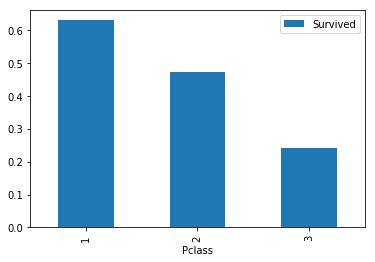

In [15]:
data_clase.plot.bar()

In [16]:
data_titanic.loc[data_titanic['Sex']== 'female'].groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            3
        1           91
2       0            6
        1           70
3       0           72
        1           72
Name: Survived, dtype: int64

In [17]:
data_titanic.loc[data_titanic['Sex']== 'male'].groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            77
        1            45
2       0            91
        1            17
3       0           300
        1            47
Name: Survived, dtype: int64

In [52]:
pasajero = data_titanic.iloc[random.randint(0, len(data_titanic))]


In [53]:
probabilidad_sexo_clase = (data_titanic[data_titanic.Sex == pasajero.Sex][data_titanic.Pclass == pasajero.Pclass].groupby(['Pclass', 'Survived', 'Sex'])['Survived'].count())/data_titanic[data_titanic.Sex == pasajero.Sex][data_titanic.Pclass == pasajero.Pclass].PassengerId.count()*100

In [54]:
data_titanic[data_titanic.Sex == pasajero.Sex][data_titanic.Pclass == pasajero.Pclass].PassengerId.count()

76

In [55]:
print(probabilidad_sexo_clase, pasajero)


Pclass  Survived  Sex   
2       0         female     7.894737
        1         female    92.105263
Name: Survived, dtype: float64 PassengerId                              707
Survived                                   1
Pclass                                     2
Name           Kelly, Mrs. Florence "Fannie"
Sex                                   female
Age                                       45
SibSp                                      0
Parch                                      0
Ticket                                223596
Fare                                    13.5
Cabin                                    NaN
Embarked                                   S
Name: 706, dtype: object


## 2. Probabilidad de supervivencia por sexo

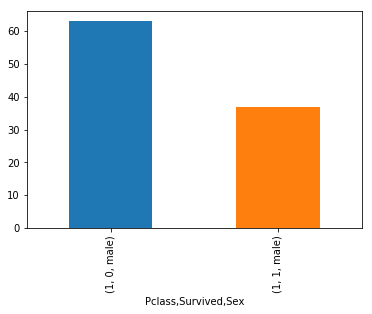

In [22]:
probabilidad_sexo_clase.plot.bar()

In [23]:
data_titanic.loc[data_titanic['Sex'] == 'female'].loc[data_titanic['Pclass'] == 3]['Survived'].count()

144

In [24]:
data_titanic.Age.isna().sum()

177

In [25]:
data_titanic.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
male = 0
female = 1
n =pd.DataFrame(data_titanic[['Sex','Age']])


In [27]:
n.loc[data_titanic['Sex'] == 'female'].Age.mean()

27.915708812260537

In [28]:
n.loc[data_titanic['Sex'] == 'male'].Age.mean()

30.72664459161148

In [29]:
n.loc[data_titanic['Sex'] == 'female'].Age.std()

14.110146457544134

In [30]:
n.loc[data_titanic['Sex'] == 'male'].Age.std()

14.678200823816601

In [31]:
n.loc[data_titanic['Sex'] == 'female'].Age.median()

27.0

In [32]:
n.loc[data_titanic['Sex'] == 'female'].loc[n.Age == 24].count()

Sex    16
Age    16
dtype: int64

## 3. Cálculo de probabilidad de supervivencia por sexo y clase
```
prob = (ds[ds.Pclass == passenger.Pclass][ds.Sex == passenger.Sex].groupby(['Pclass', 'Survived', 'Sex'])['Survived'].count())/ds[ds.Sex == passenger.Sex][ds.Pclass == passenger.Pclass].PassengerId.count()*100```


In [39]:
import random
import sys
ds = pd.read_csv("data/titanic/train.csv")
match = 0
total = len(ds)
qty = total - 1
sys.stdout.flush()
sys.stdout.write('Calculando ')
for i in range(0, qty):
    passenger = ds.iloc[i]
    sys.stdout.write('.')
    prob = (ds[ds.Pclass == passenger.Pclass][ds.Sex == passenger.Sex].groupby(['Pclass', 'Survived', 'Sex'])['Survived'].count())/ds[ds.Sex == passenger.Sex][ds.Pclass == passenger.Pclass].PassengerId.count()*100
    # print("Pasajero: " + passenger.Name + "\nSexo: " + passenger.Sex + "\nClase: " + str(passenger.Pclass) + "\nTiene " + str(round(prob[0], 2)) + "% de morir\nMurió?: " + str(passenger.Survived == 0) +  "\n" )
    if prob[0] != 50 and passenger.Survived == 0 and prob[0] > 50:
        match += 1
    elif prob[0] == 50:
        total -= 1
        
print("\n\n** Acerté " + str(match) + " de " + str(total) + " (" + str(round(match * 100 / total)) + "%) ** ")

Calculando ..........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

** Acerté 467 de 747 (63%) ** 
